In [3]:
# !python -m spacy download en_core_web_sm

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from google_play_scraper import Sort, reviews
sys.path.append(os.path.abspath("../scripts"))
from sentiment_analysis import compute_vader_sentiment
from thematic_analysis import extract_keywords, tag_themes, assign_themes
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Belay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# %%
os.chdir("..")  # Go up a directory
#print(os.getcwd())

# %%
# print(os.getcwd())

In [6]:
# nlp = spacy.load("en_core_web_sm")

In [3]:
"""
task2_main.py

Runs sentiment and thematic analysis on bank app reviews.
"""

# def main():
    # Load cleaned reviews
df = pd.read_csv("data/cleaned_bank_reviews.csv")

    # --- Sentiment Analysis ---
df_sentiment = compute_vader_sentiment(df)
print("✅ Sentiment analysis complete.")

print("📄 Saved sentiment scores and keyword themes.")
print(df_sentiment[['Bank', 'Review Description', 'sentiment_label', 'sentiment_score']].head())    

✅ Sentiment analysis complete.
📄 Saved sentiment scores and keyword themes.
  Bank                                 Review Description sentiment_label  \
0  CBE                         So bad now and hard to use        negative   
1  CBE  it is so amazing app. but, it is better to upd...        positive   
2  CBE                                         v.good app         neutral   
3  CBE                                      very good app        positive   
4  CBE           Very amazing app indeed. I'm enjoying it        positive   

   sentiment_score  
0          -0.6361  
1           0.9049  
2           0.0000  
3           0.4927  
4           0.8173  


In [ ]:
df_bank = pd.read_csv("data/cleaned_bank_reviews.csv")
df_bank.head()

,Review Description,User,Rating,Date,Bank,Source
0,So bad now and hard to use,Daniel Ephrem,5,2025-06-09,CBE,Google Play Store
1,"it is so amazing app. but, it is better to upd...",abdulkerim habib,5,2025-06-09,CBE,Google Play Store
2,v.good app,Abdulhalim Bedre,4,2025-06-09,CBE,Google Play Store
3,very good app,Moha Yimer,1,2025-06-09,CBE,Google Play Store
4,Very amazing app indeed. I'm enjoying it,Puoch chuol Wath,5,2025-06-08,CBE,Google Play Store


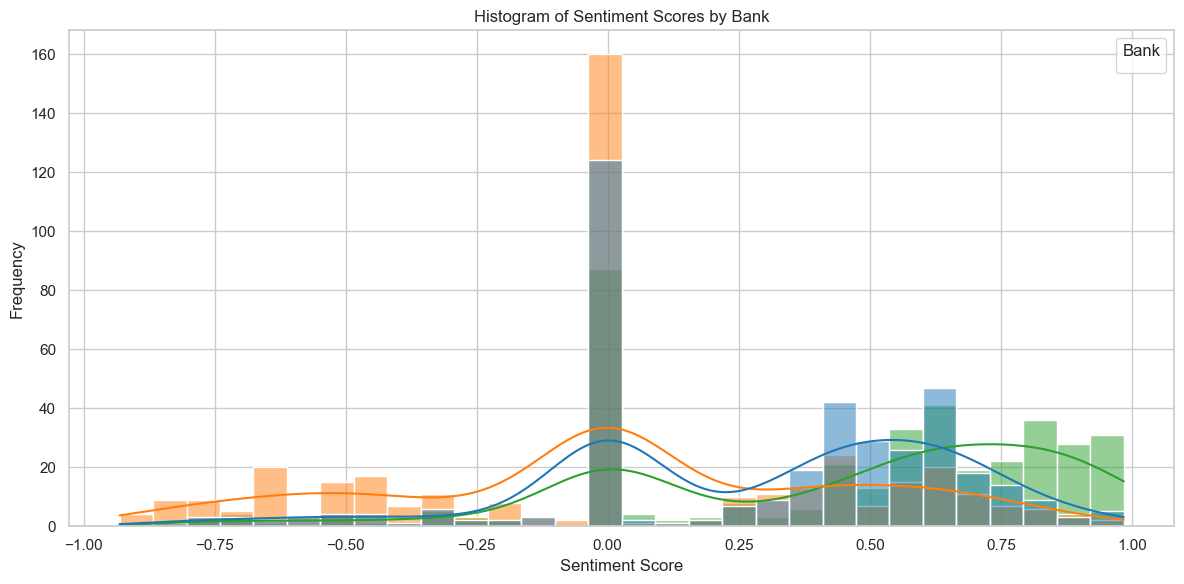

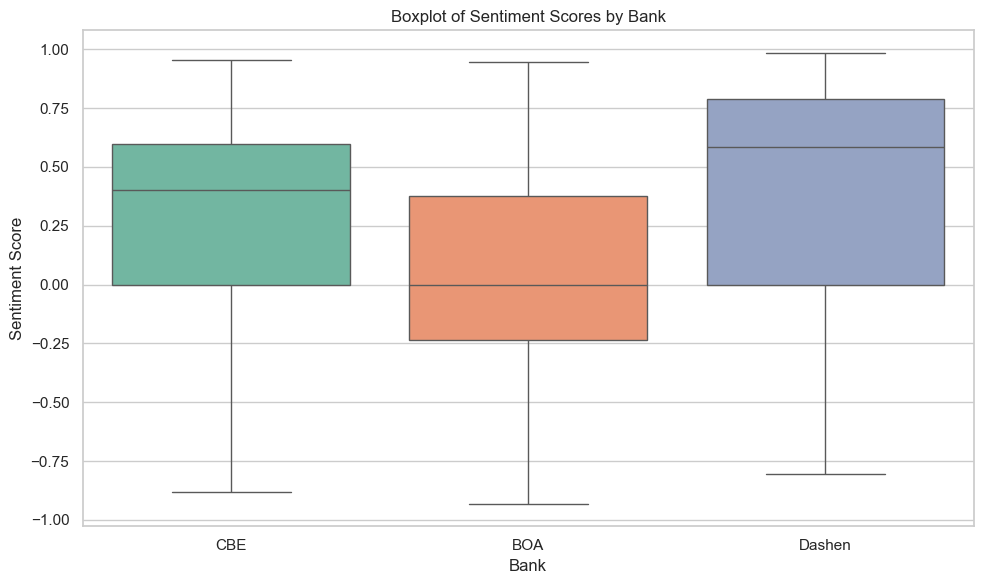

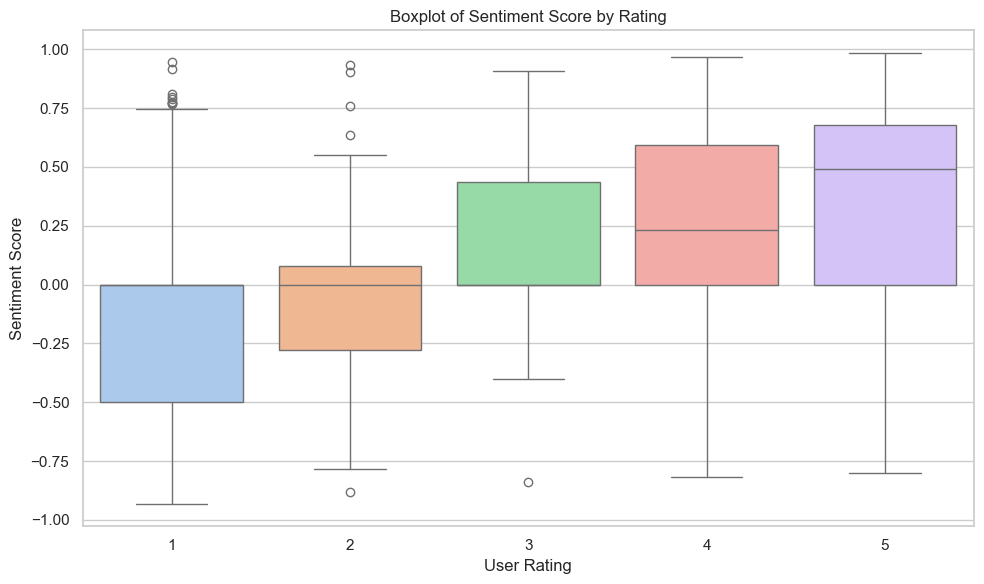

In [18]:
sns.set(style="whitegrid")

# Histogram: Sentiment distribution per bank
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentiment_score', hue='Bank', kde=True, bins=30, palette='tab10')
plt.title("Histogram of Sentiment Scores by Bank")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend(title='Bank')
plt.tight_layout()
plt.savefig("histogram_sentiment_by_bank.png", dpi=300)
plt.show()

# Boxplot: Sentiment score by bank
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bank', y='sentiment_score', palette='Set2')
plt.title("Boxplot of Sentiment Scores by Bank")
plt.xlabel("Bank")
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.savefig("boxplot_sentiment_by_bank.png", dpi=300)
plt.show()

# Optional: Boxplot of sentiment by rating across all banks
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='sentiment_score', palette='pastel')
plt.title("Boxplot of Sentiment Score by Rating")
plt.xlabel("User Rating")
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.savefig("boxplot_sentiment_by_rating.png", dpi=300)
plt.show()

In [12]:
# Convert sentiment labels to numerical scale (optional)
sentiment_map = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0, 'UNKNOWN': None}
df['sentiment_value'] = df['sentiment_label'].map(sentiment_map)

# Aggregate
agg = df.groupby(['Bank', 'Rating'])['sentiment_score'].mean().reset_index()
print(agg.head(100))


      Bank  Rating  sentiment_score
0      BOA       1        -0.166768
1      BOA       2        -0.015687
2      BOA       3         0.145700
3      BOA       4         0.270408
4      BOA       5         0.262353
5      CBE       1        -0.017637
6      CBE       2        -0.013019
7      CBE       3         0.112164
8      CBE       4         0.248373
9      CBE       5         0.386781
10  Dashen       1        -0.021764
11  Dashen       2        -0.052444
12  Dashen       3         0.331625
13  Dashen       4         0.264967
14  Dashen       5         0.543729


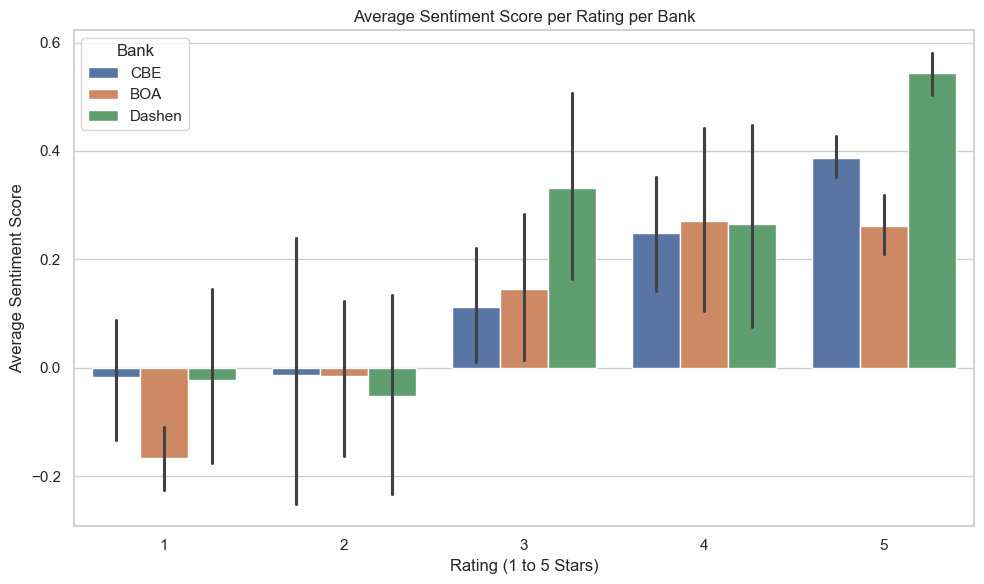

In [16]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Rating', y='sentiment_score', hue='Bank')

# Customize the plot
plt.title('Average Sentiment Score per Rating per Bank')
plt.xlabel('Rating (1 to 5 Stars)')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Bank')
plt.tight_layout()

# Save or show the plot
plt.savefig("avg_sentiment_per_rating_per_bank.png", dpi=300)
plt.show()